## Objectius
- Neteja i interpretació de les dades.
- Preprocessats.
- Creació de models de classificació (arbres de classificació, KNN - k-Nearest neighbors, regressió logística, support vector machine, XGboost, altres models...).
- Utilització de les mètriques per interpretar els resultats.
- Estudi i modificació de paràmetres.

## Exercicis d'algoritmes de Classificació.

### - Exercici 1
- Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import metrics
from sklearn import preprocessing
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
Vins = pd.read_csv('wineData.txt',  index_col = None, header = None)
Vins.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
#Afegeixo noms de columnes segons la info trobada
columns = ['class','alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline']
Vins.columns =  columns

In [4]:
Vins.head()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
Vins.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
class,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


- Veiem que son mostres de 178 vins. "The chemical attributes are all numerical and continuous. This is a list of the 14 variables:"
- Un es el identificador de la varietat i els altres son atributs de la composició química.  
- Veiem que la majoria son vins amb alta graduació 75% 13,6% i alcohol te una std molt petita, tots els valors al voltant de la mitja, aixi com la alcalinitat.
- La variable "Ash" te una desviació estàndar baixa (0.274), per tant els valors estàn aprop del valor promig de 2.367.
- La variable "Magnesium" te un valor promig de 99.742 i una desviació estàndar de 14.282, indicant una amplia dispersió de valors.
- La variable "Proline" te un valor promig de 746.893 i una desviació estàndar de 314.907, per tant també te una amplia dispersió de valors.
- Hi han 3 classes/categories de vins, com diu la info, segons la varietat de la vinya.
- No hi ha cap variable binària

In [6]:
Vins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class                         178 non-null    int64  
 1   alcohol                       178 non-null    float64
 2   malic_acid                    178 non-null    float64
 3   ash                           178 non-null    float64
 4   alcalinity_of_ash             178 non-null    float64
 5   magnesium                     178 non-null    int64  
 6   total_phenols                 178 non-null    float64
 7   flavanoids                    178 non-null    float64
 8   nonflavanoid_phenols          178 non-null    float64
 9   proanthocyanins               178 non-null    float64
 10  color_intensity               178 non-null    float64
 11  hue                           178 non-null    float64
 12  od280/od315_of_diluted_wines  178 non-null    float64
 13  proli

La varietat(class) es una variable categòrica amb nomes 3 valors: 1, 2 i 3.
Tot son variables númeriques de tipus float o int.

  #### Informació trobada sobre la base de dades:
    -- These data are the results of a chemical analysis of wines grown in the same region in Italy but derived 
    from three different cultivars. The analysis determined the quantities of 13 constituents found in each of 
    the three types of wines. 

    -- I think that the initial data set had around 30 variables, but for some reason I only have the 13 
    dimensional version. I had a list of what the 30 or so variables were, but a.) I lost it, and b.), 
    I would not know which 13 variables are included in the set.

    -- The attributes are (dontated by Riccardo Leardi, riclea@anchem.unige.it )
 - 1) Alcohol
 - 2) Malic acid
 - 3) Ash
 - 4) Alcalinity of ash  
 - 5) Magnesium
 - 6) Total phenols
 - 7) Flavanoids
 - 8) Nonflavanoid phenols
 - 9) Proanthocyanins
 - 10)Color intensity
 - 11)Hue
 - 12)OD280/OD315 of diluted wines
 - 13)Proline            

5. Number of Instances

      - class 1 59
	  - class 2 71
	  - class 3 48

6. Number of Attributes 
	
	13

7. For Each Attribute:

	All attributes are continuous
	
	No statistics available, but suggest to standardise variables for certain uses 
    (e.g. for us with classifiers which are NOT scale invariant)

	NOTE: 1st attribute is class identifier (1-3)

8. Missing Attribute Values:

	None



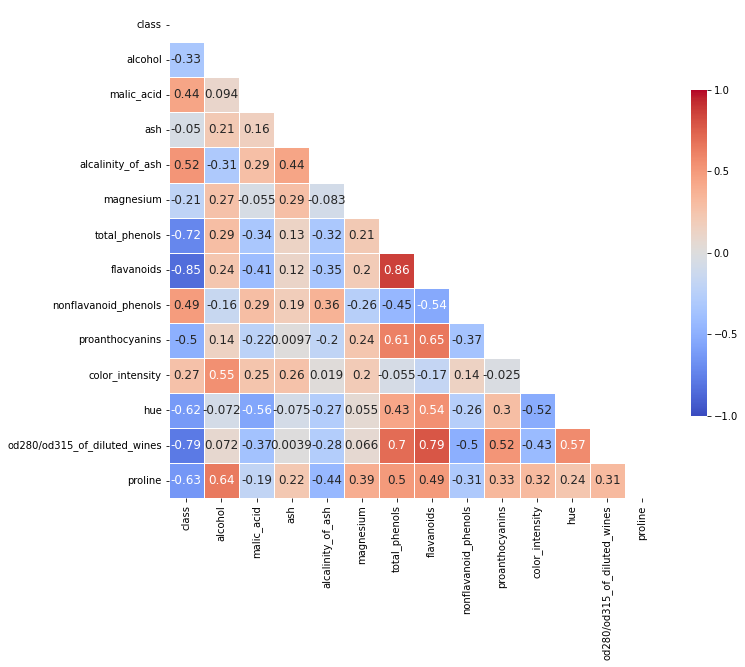

In [7]:
#Veiem la correlació entre variables 
f, ax = plt.subplots(figsize=(11, 15)) 
mask = np.triu(np.ones_like(Vins.corr())) 
#Aquest mask np.triu treu el mirall (triangle idèntic) al heatmap
heatmap = sns.heatmap(Vins.corr(method='pearson'), 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})

#add the column names as labels
ax.set_yticklabels(Vins.corr().columns, rotation = 0)
ax.set_xticklabels(Vins.corr().columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

- Gran correlació directe entre els Total_phenols i els flavanoids.(Els flavonoides són una varietat de compostos fenòlics sintetitzats, wikipedia dixit :)) Per tant seria 2 variables amb gran correlació entre elles i per tant podria provocar que no generalitzi bé, el que podem fer és aplicar PCA o Multicolinearitat (per eliminar aquelles que són proporcionals a altres).·"La multicolinearitat no afecta les prediccions"
- Correlació negativa gran entre Class i flavanoids, els flavanoids intervenen en la formació de pigments.
- Correlació negativa gran entre Class i diluted wines...
- Correlació negativa gran entre Class i total phenols...
- Sembla que a mesura que la classe augmenta aquest components disminueixen: Exemple, la classe 3 te menys flavanoids i té menys diluida od280/315 of diluted wines i te menys phenols i al contrari, la classe 1 la que més te aquests components. Podria ser que la classe es un indicador de la qualitat.Ho comprovo amb una mostra  d'un d'aquests components:


<AxesSubplot:xlabel='flavanoids', ylabel='od280/od315_of_diluted_wines'>

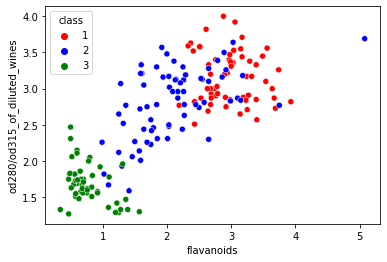

In [8]:
color_dict={1:'red',3:'green',2:'blue'}#color de les 3 classes de vins 
sns.scatterplot(Vins['flavanoids'],Vins['od280/od315_of_diluted_wines'],hue=Vins['class'],palette=color_dict)

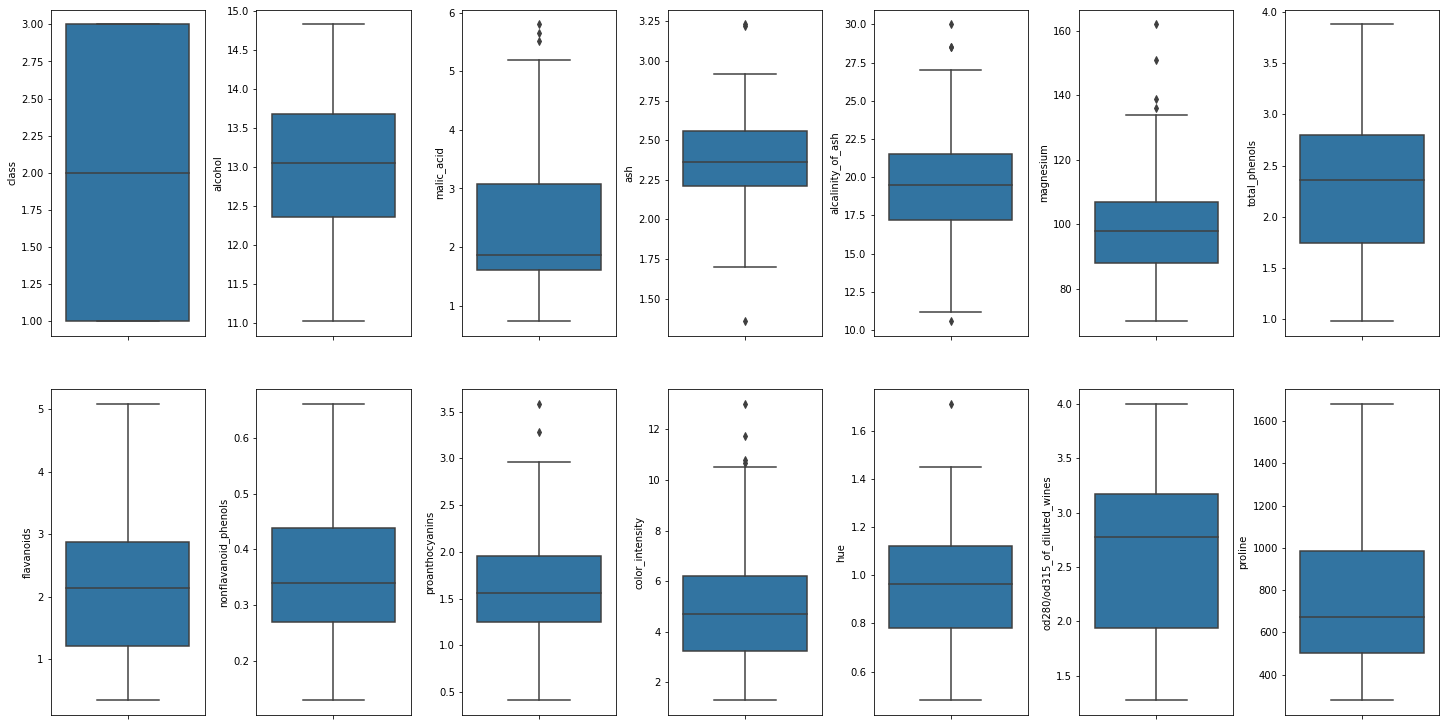

In [9]:
#Miro les distribucions gràfiques de les variables per decidir com son les variables distribuides, 
# si son semblants, outliers,etc:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in Vins.items():
    sns.boxplot(y=k, data=Vins, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

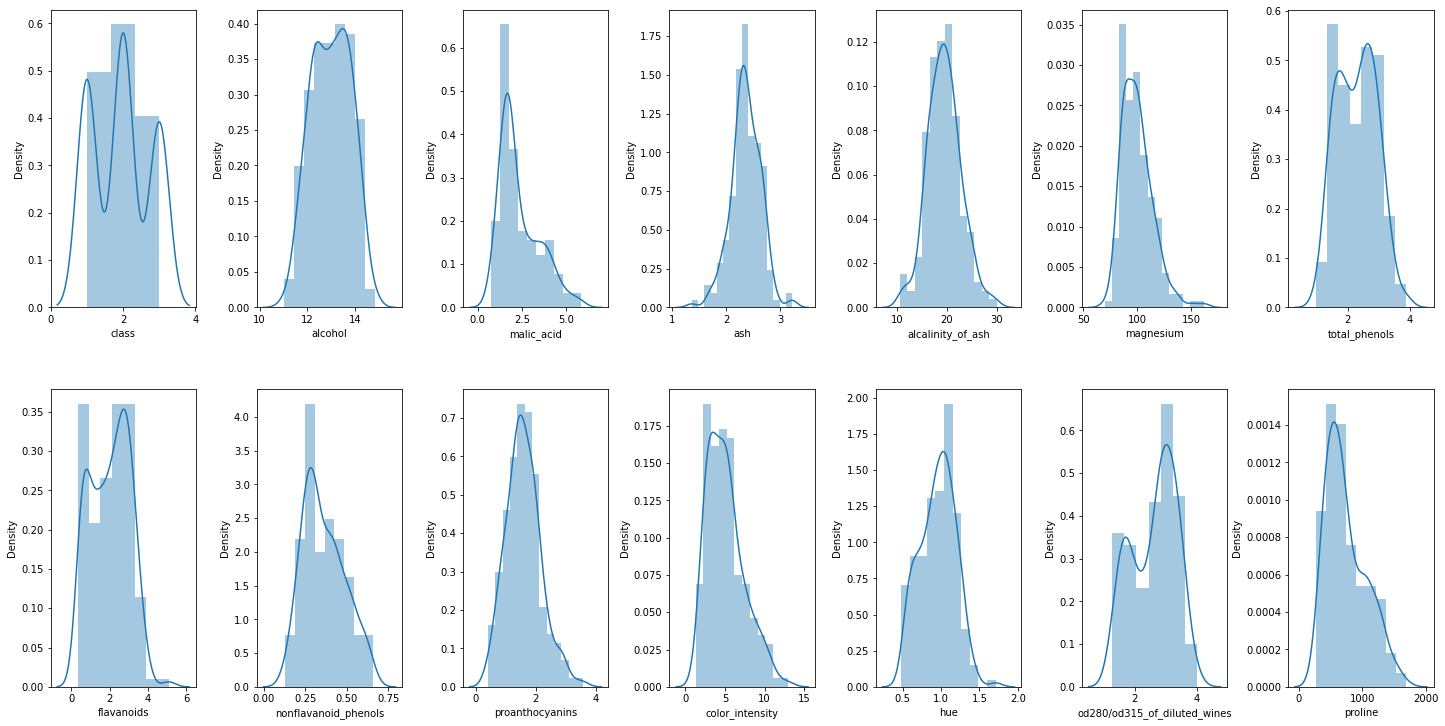

In [10]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in Vins.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

- Veiem alguna distribució normal com alcohol, però s'hauria de comprovar.
- Hi ha 7 variables amb outliers com: 'malic_acid', 'ash', 'proanthocyanins','color_intensity', 'magnesium', 'alcalinity_of_ash'i 'hue'

### Preprocessat

- Tot i que posa a la info que no hi ha nulls, ho comprovo:
   

In [11]:
 Vins.isnull().sum() | Vins.isna().sum()


class                           0
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [12]:
Vins[Vins.duplicated()]

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline


- Es veu clarament que la variable target es la unica variable categòrica (class), per tant comprovo si totes
les altres estàn normalment distribuides:

In [13]:
from scipy import stats

print('Hipotesis nul.la Ho -> La mostra té una distribució normal')
print('Hipotesis alternativa H1 -> La mostra no té una distribució normal\n\n')

for i in Vins.columns:
    shapiro_test = stats.shapiro(Vins[i])
    print('La variable ', i, "te un p-value de ", shapiro_test.pvalue)
    if shapiro_test.pvalue > 0.05:
        print("No podem rebutjar hipòtesi nul.la")
    else:
        print("Podem rebutjar la hipòtesi nul.la")


Hipotesis nul.la Ho -> La mostra té una distribució normal
Hipotesis alternativa H1 -> La mostra no té una distribució normal


La variable  class te un p-value de  3.526998097335039e-14
Podem rebutjar la hipòtesi nul.la
La variable  alcohol te un p-value de  0.02005171775817871
Podem rebutjar la hipòtesi nul.la
La variable  malic_acid te un p-value de  2.9459296113643063e-10
Podem rebutjar la hipòtesi nul.la
La variable  ash te un p-value de  0.03868526220321655
Podem rebutjar la hipòtesi nul.la
La variable  alcalinity_of_ash te un p-value de  0.26386943459510803
No podem rebutjar hipòtesi nul.la
La variable  magnesium te un p-value de  6.345416068143095e-07
Podem rebutjar la hipòtesi nul.la
La variable  total_phenols te un p-value de  0.004395752213895321
Podem rebutjar la hipòtesi nul.la
La variable  flavanoids te un p-value de  1.6790636436780915e-05
Podem rebutjar la hipòtesi nul.la
La variable  nonflavanoid_phenols te un p-value de  0.00010552661115070805
Podem rebutjar la hipòte

- Veiem que no hi ha cap variable amb distribució normal, excepte 'alcalinity_of_ash'
- Només la variable alcalinity_of_ash té un p-valor superior, de manera que no es pot rebutjar la hipòtesi nul·la que segueix una distribució normal per aquesta variable.
-'malic_acid', 'ash', 'proanthocyanins','color_intensity', 'magnesium', 'hue' tenen outliers 
per tant li aplicarem RobustScaler i la resta MinMax

In [14]:
#Apliquem standarització a:
columna_alcalinity = Vins[['alcalinity_of_ash']]
scaler = StandardScaler().fit(columna_alcalinity)
columna_alcalinity = scaler.transform(columna_alcalinity)
Vins['alcalinity_of_ash'] = columna_alcalinity

In [15]:
# Aplico RobustScaler als que tenen outliers:
columnsRobust = ['malic_acid','ash','magnesium','proanthocyanins', 'color_intensity', 'hue']
scaler = preprocessing.RobustScaler().fit(Vins[columnsRobust])
Vins[columnsRobust] = scaler.transform(Vins[columnsRobust])

In [16]:
#Apliquem MinMax a la resta:
columnsNorm = ['alcohol', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols','od280/od315_of_diluted_wines', 'proline']
scaler = preprocessing.MinMaxScaler().fit(Vins[columnsNorm])
Vins[columnsNorm] = scaler.transform(Vins[columnsNorm])

In [17]:
Vins # Mirem els valors que han estat tots escalats, excepte el target (Class en aquest cas que es de 1 a 3)

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1,0.842105,-0.104730,0.201439,-1.169593,1.526316,0.627586,0.573840,0.283019,1.050000,0.318792,0.222222,0.970696,0.561341
1,1,0.571053,-0.057432,-0.633094,-2.490847,0.105263,0.575862,0.510549,0.245283,-0.392857,-0.104027,0.251852,0.780220,0.550642
2,1,0.560526,0.334459,0.892086,-0.268738,0.157895,0.627586,0.611814,0.320755,1.792857,0.332215,0.192593,0.695971,0.646933
3,1,0.878947,0.057432,0.402878,-0.809251,0.789474,0.989655,0.664557,0.207547,0.892857,1.043624,-0.311111,0.798535,0.857347
4,1,0.581579,0.489865,1.467626,0.451946,1.052632,0.627586,0.495781,0.490566,0.378571,-0.124161,0.222222,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,0.705263,2.557432,0.258993,0.301803,-0.157895,0.241379,0.056962,0.735849,-0.707143,1.010067,-0.962963,0.172161,0.329529
174,3,0.623684,1.381757,0.345324,1.052516,0.210526,0.282759,0.086498,0.566038,-0.207143,0.875839,-0.785185,0.106227,0.336662
175,3,0.589474,1.631757,-0.287770,0.151661,1.157895,0.210345,0.073840,0.566038,-0.292857,1.848993,-1.111111,0.106227,0.397290
176,3,0.563158,0.489865,0.028777,0.151661,1.157895,0.231034,0.071730,0.754717,-0.135714,1.546980,-1.081481,0.128205,0.400856


In [18]:
from sklearn.model_selection import train_test_split

X = Vins.drop(['class'],axis=1)#Features-Variables Independents
y = Vins['class'] #Target-Variable Depenent
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) 
#aplico 80% train, 20% test i un random state 45 per observar les mateixes dades
X_train.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,1.420000e+02,1.420000e+02,142.000000,142.000000,142.000000
mean,0.508469,0.320660,0.051272,0.022031,0.126390,0.445896,0.355144,0.443529,4.537223e-02,1.340864e-01,-0.026166,0.473379,0.327761
std,0.214461,0.754305,0.774538,1.013004,0.764172,0.225701,0.214973,0.240157,8.287890e-01,7.620640e-01,0.696869,0.256138,0.227909
min,0.000000,-0.760135,-1.899281,-2.490847,-1.052632,0.000000,0.000000,0.018868,-1.635714e+00,-1.144295e+00,-1.437037,0.000000,0.000000
25%,0.342763,-0.184122,-0.431655,-0.674123,-0.473684,0.241379,0.165612,0.264151,-5.785714e-01,-4.815436e-01,-0.629630,0.221612,0.145506
50%,0.511842,0.003378,0.000000,0.001518,0.000000,0.446552,0.375527,0.396226,-1.587272e-16,1.491862e-16,-0.014815,0.540293,0.272468
75%,0.678947,0.822635,0.568345,0.602088,0.526316,0.627586,0.516878,0.603774,5.642857e-01,5.604027e-01,0.459259,0.675824,0.467011
max,1.000000,2.658784,2.503597,3.154511,3.368421,1.000000,1.000000,1.000000,2.892857e+00,2.369128e+00,2.207407,0.934066,1.000000


In [19]:
y_test.describe()

count    36.000000
mean      1.805556
std       0.786291
min       1.000000
25%       1.000000
50%       2.000000
75%       2.000000
max       3.000000
Name: class, dtype: float64

In [20]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(142, 13) (36, 13) (142,) (36,)


- Apliquem Support vector machine model: **SVM** és un algorisme de classificació supervisada que busca una línia 
(o hiperpla) que millor separi les dades de diferents classes. SVM amb un nucli lineal pot gestionar dades no separables de manera lineal millor que la regressió lineal i és més robust als valors atípics(outliers) i funciona molt bé amb bases de dades relacionals.

In [21]:

from sklearn import svm
#Utilitzem la classe SVC dins del modul svm de scikit-learn.

clfsvm = svm.SVC() #  crea un classificador SVM 
# utilitzant la classe svm.SVC() 

#Entrenem el model amb els training sets
clfsvm.fit(X_train, y_train)

#Predim la resposta per les dates test 
y_pred_svm = clfsvm.predict(X_test)

#Importem de scikit-learn el modul metrics modul per calcular la precissió/accuracy
from sklearn import metrics

# Model Accuracy: quant cops la predicció es correcte?
print("Precisió: %{}".format(metrics.accuracy_score(y_test, y_pred_svm)*100))

print(y_pred_svm[0:10])# Els 10 primers valors predictius



Precisió: %97.22222222222221
[2 2 2 1 3 1 3 2 1 3]


-Provem amb **Decision tree Classifier** o arbre de decisió que es una bona opció per bases de dades relacionals.

In [22]:
from sklearn.tree import DecisionTreeClassifier

 #Creem un object de Decision Tree classifer 
DTC = DecisionTreeClassifier()

# Entrenem el model Decision Tree Classifer amb les dades d'entrenament.
DTC.fit(X_train,y_train)

#Predim la resposta per test dataset
y_pred_DTC = DTC.predict(X_test)

print("Precisió: %{}".format(metrics.accuracy_score(y_test, y_pred_DTC)*100))

print(y_pred_DTC[0:10])# Els 10 primers valors predictius

Precisió: %91.66666666666666
[2 2 2 1 3 1 3 2 1 3]


In [23]:
class_names = np.unique(y_train).astype(str)
class_names


array(['1', '2', '3'], dtype='<U21')

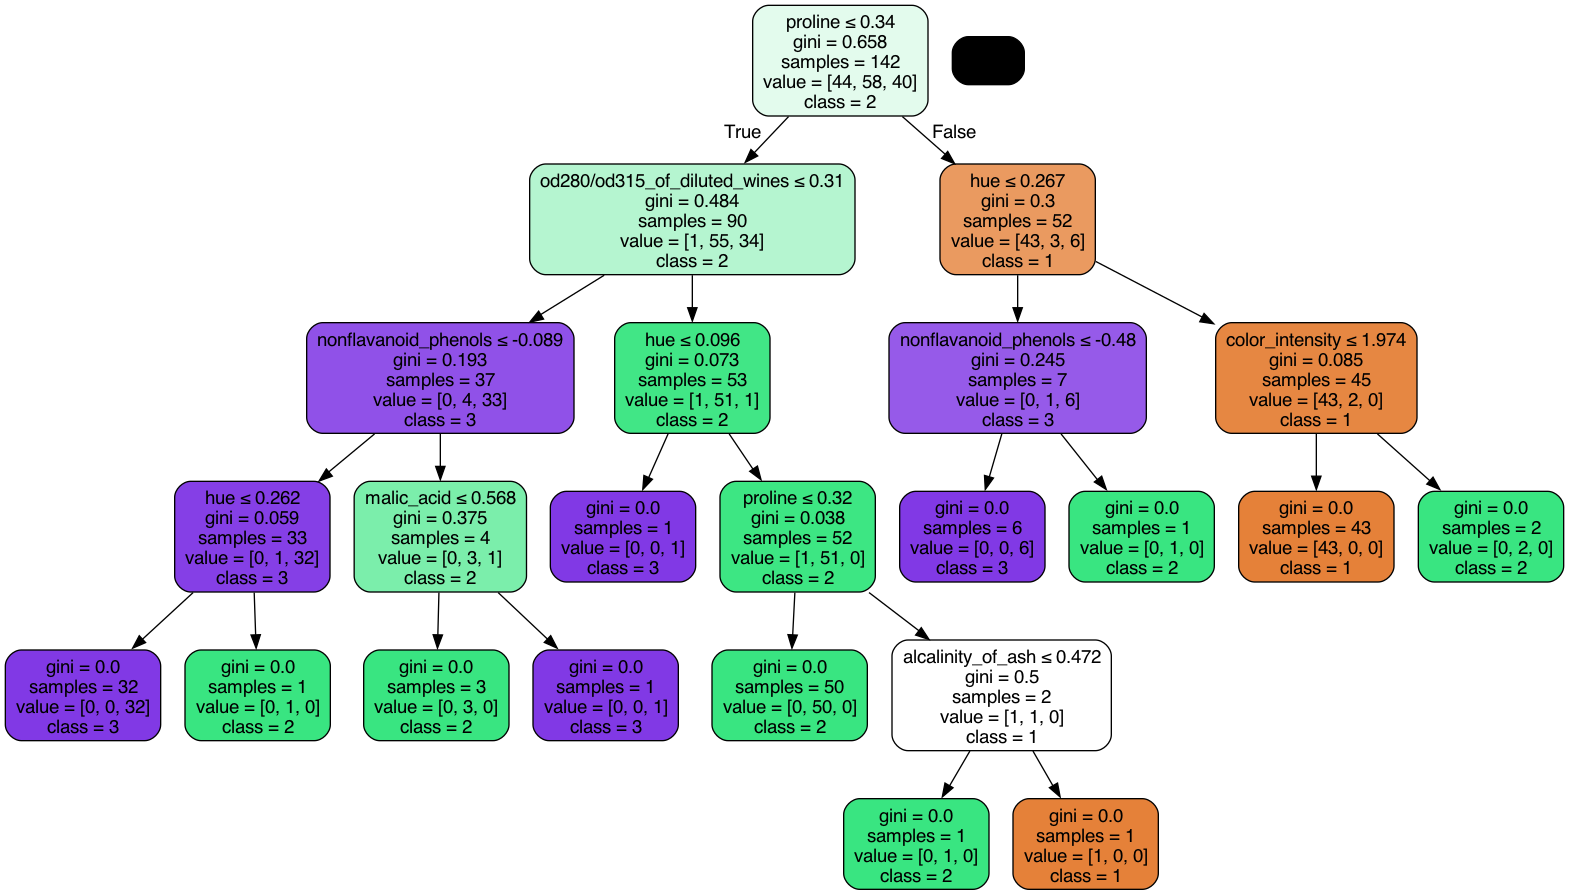

In [24]:
# Visualització del arbre
feature_cols = ['malic_acid', 'ash', 'magnesium', 'proanthocyanins', 'color_intensity', 'alcalinity_of_ash', 'hue', 'alcohol', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'od280/od315_of_diluted_wines', 'proline']


from six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(DTC, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['1', '2', '3'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Vins.png')
Image(graph.create_png())

In [25]:
from sklearn.neighbors import KNeighborsClassifier
# Create Decision Tree classifer object
knn = KNeighborsClassifier()

# Train Decision Tree Classifer# Train Decision Tree Classifer
knn = knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_knn = knn.predict(X_test)
print("Precisió: %{}".format(metrics.accuracy_score(y_test, y_pred_knn)*100))

print(y_pred_knn[0:10])# Els 10 primers valors predictius

Precisió: %94.44444444444444
[2 2 3 1 3 1 3 2 1 3]


In [26]:
Prediccio_knn = y_pred_knn[0:10]
Prediccio_DTC = y_pred_DTC[0:10]
Prediccio_svm = y_pred_svm[0:10]

#  Creo un DataFrame separat per cada model
df_knn = pd.DataFrame(Prediccio_knn, columns=['Predicciones KNN'])
df_dtc = pd.DataFrame(Prediccio_DTC, columns=['Predicciones DTC'])
df_svm = pd.DataFrame(Prediccio_svm, columns=['Predicciones SVM'])
prediccions = pd.concat([df_knn, df_dtc, df_svm], axis=1)
prediccions
                                  

,Predicciones KNN,Predicciones DTC,Predicciones SVM
0,2,2,2
1,2,2,2
2,3,2,2
3,1,1,1
4,3,3,3
5,1,1,1
6,3,3,3
7,2,2,2
8,1,1,1
9,3,3,3


### -  Exercici 2
Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confusió i d’altres mètriques més avançades.

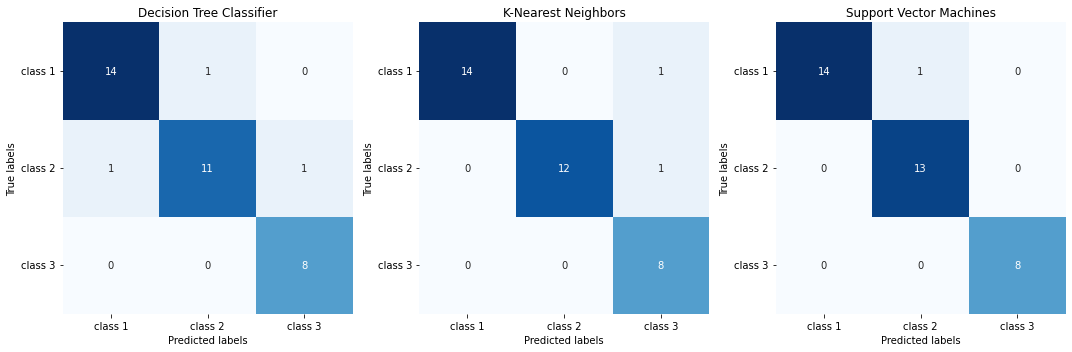

In [27]:
# Creo una figura amb 3 subplots i les matrius de confusió:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Calculem les matrius de confusió:
from sklearn.metrics import confusion_matrix
cf_matrixDTC = confusion_matrix(y_test, y_pred_DTC)
cf_matrixknn = confusion_matrix(y_test, y_pred_knn)
cf_matrixsvm = confusion_matrix(y_test, y_pred_svm)

# Configuració de les llegendes
Nro_Class = ['class 1','class 2','class 3']
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_svm), 
                  columns=Nro_Class, index = Nro_Class)
                  
# Heatmap 1
sns.heatmap(cf_matrixDTC, annot=True, fmt='d', ax=axs[0], cmap='Blues', cbar=False)
axs[0].set_xlabel('Predicted labels')
axs[0].set_ylabel('True labels')
axs[0].set_title('Decision Tree Classifier')
axs[0].xaxis.set_ticklabels(Nro_Class)
axs[0].yaxis.set_ticklabels(Nro_Class, rotation=0)

# Heatmap 2
sns.heatmap(cf_matrixknn, annot=True, fmt='d', ax=axs[1], cmap='Blues', cbar=False)
axs[1].set_xlabel('Predicted labels')
axs[1].set_ylabel('True labels')
axs[1].set_title('K-Nearest Neighbors')
axs[1].xaxis.set_ticklabels(Nro_Class)
axs[1].yaxis.set_ticklabels(Nro_Class, rotation=0)

# Heatmap 3
sns.heatmap(cf_matrixsvm, annot=True, fmt='d', ax=axs[2], cmap='Blues', cbar=False)
axs[2].set_xlabel('Predicted labels')
axs[2].set_ylabel('True labels')
axs[2].set_title('Support Vector Machines')
axs[2].xaxis.set_ticklabels(Nro_Class)
axs[2].yaxis.set_ticklabels(Nro_Class, rotation=0)

# Mostra la figura
plt.tight_layout()
plt.show()


- Veiem que en general els resultats son força bons ja que les 3 classes s'han predit bé en tots els casos.
- Veiem novament que el model Support Vector Machines es el que prediu millor. Nomes te un fals negatiu per la Classe 2 de vins, la resta es perfecte.
- Al Decision Tree es el que te mes 4 falsos negatius per la Class 2
- K-Nearest Neighbours te 2 falsos negatius i 1 fals positiu.

**Decision Tree Classifier**

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_DTC))

              precision    recall  f1-score   support

           1       0.93      0.93      0.93        15
           2       0.92      0.85      0.88        13
           3       0.89      1.00      0.94         8

    accuracy                           0.92        36
   macro avg       0.91      0.93      0.92        36
weighted avg       0.92      0.92      0.92        36



**K-Nearest Neighbors**

In [29]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           1       1.00      0.93      0.97        15
           2       1.00      0.92      0.96        13
           3       0.80      1.00      0.89         8

    accuracy                           0.94        36
   macro avg       0.93      0.95      0.94        36
weighted avg       0.96      0.94      0.95        36



**Support Vector Machines**

In [30]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           1       1.00      0.93      0.97        15
           2       0.93      1.00      0.96        13
           3       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



Mirem el **classification report** que dona les seguents dades:
- Precisió (Precision): que és la proporció de veritables positius (TP) dividida entre el total de prediccions positives.
    Veiem que per la classe 3 te una precisió perfecte en tot tres models.
- Sensibilitat (Recall): que és la proporció de TP dividida per la suma de TP i falsos negatius (FN).
    Veiem amb el model Support Vector Machine te una precisió i recall perfecte per la classe 1
- Puntuació F1 (F1-score): que és la mitjana harmònica de la precisió i la sensibilitat. Veiem de nou que Support Vector Machineses le que dona millors resultats tant de precisió, com de F1.
- Suport (Support): que indica el nombre total d'exemples per classe.
- Exactitud (Accuracy): que és la proporció de classificacions correctes en relació amb el total de mostres.


In [31]:
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


accuracy_SVC = metrics.accuracy_score(y_test, y_pred_svm)
accuracy_DTC = metrics.accuracy_score(y_test, y_pred_DTC)
accuracy_knn = metrics.accuracy_score(y_test, y_pred_knn)
SVC_f1 = f1_score(y_test, y_pred_svm, average='macro')
DTC_f1 = f1_score(y_test, y_pred_DTC, average='macro')
knn_f1 = f1_score(y_test, y_pred_knn, average='macro')
metrics = pd.DataFrame(data = [('Support Vector Machine', accuracy_SVC, SVC_f1), 
                              ('DecisionTreeClassifier',accuracy_DTC, DTC_f1),('K-Neighbors Classifier', accuracy_knn, knn_f1)],
                             columns = ['Model', 'Accuracy', 'F1'])

metrics

,Model,Accuracy,F1
0,Support Vector Machine,0.972222,0.976160
1,DecisionTreeClassifier,0.916667,0.918170
2,K-Neighbors Classifier,0.944444,0.938135


-Mirem que en el SVM el model también aconsegueix una puntuació F1 de 0.972, per tant també mostra una bona precisió en la tasca de classificar. 

### - Exercici 3
Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.

Mirem primer **Support Vector Machines** que es el que ens dona millors prediccions per tal de millorar-lo encara més.


In [32]:
clfsvm.get_params() # parameters del model Support Vector Machines anterior.


{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [33]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score



param_gridSVM = [
    {"kernel": ["linear"], "C": [0.01, 0.1, 1, 10, 100]},  
    {"kernel": ["rbf"], "C": [0.01, 0.1, 1, 10, 100], "gamma": ['auto', 'scale']},
    {"kernel": ["poly"], "C": [0.01, 0.1, 1, 10, 100], "degree": np.arange(1,5,1), "gamma": ['auto', 'scale']}  
]
              
#declaro model de nou :)
modelSVC = svm.SVC()
#Amb GridSearchCV, fem una cerca sistemàtica de combinacions de paràmetres amb 5 mostres/folds
grid_search_svm = GridSearchCV(  
    estimator= modelSVC,  
    param_grid=param_gridSVM,   
    scoring = 'accuracy', 
    cv=5,  
    verbose=1 ,  
    n_jobs=-1
)

In [34]:
grid_search_svm.fit(X, y) #Fem un fit al model 

Fitting 5 folds for each of 55 candidates, totalling 275 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear']},
                         {'C': [0.01, 0.1, 1, 10, 100],
                          'gamma': ['auto', 'scale'], 'kernel': ['rbf']},
                         {'C': [0.01, 0.1, 1, 10, 100],
                          'degree': array([1, 2, 3, 4]),
                          'gamma': ['auto', 'scale'], 'kernel': ['poly']}],
             scoring='accuracy', verbose=1)

In [35]:
print(grid_search_svm.best_score_)
print(grid_search_svm.best_params_) #mirem quins son els millors paràmetres que ens dona

0.9609523809523809
{'C': 10, 'kernel': 'linear'}


- El 0,96 es el best mean_test score que no es la millor precisió/accuracy i no ho podem comparar amb el accuracy...
- Mean test score és la mitjana dels scores obtinguts per un model en les diferents validacions creuades. Sovint s'usa com a mesura durant l'optimització dels hiperparàmetres d'un model, ja que és una mesura estable que no depèn d'una partició específica de les dades.

- Accuracy, per altra banda, és la proporció de prediccions correctes fetes pel model. És una mesura més directa del rendiment, ja que ens indica el percentatge de vegades que el model prediu correctament. 
- Creo una taula amb els resultats per veure les diferents combinacions en els 5 folds

In [36]:

pd.set_option('display.max_colwidth', -1)
score_SVM = pd.DataFrame(grid_search_svm.cv_results_)
columns_to_view = ['params','mean_test_score', 'rank_test_score','split0_test_score','split1_test_score','split2_test_score','split3_test_score','split4_test_score']
score_SVM[columns_to_view].sort_values(by="rank_test_score").head()#ordenem per millor precisió/accuracy



,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score
3,"{'C': 10, 'kernel': 'linear'}",0.960952,1,0.916667,0.972222,0.944444,1.000000,0.971429
4,"{'C': 100, 'kernel': 'linear'}",0.960952,1,0.916667,0.972222,0.944444,1.000000,0.971429
47,"{'C': 100, 'degree': 1, 'gamma': 'auto', 'kernel': 'poly'}",0.960952,1,0.916667,0.972222,0.944444,1.000000,0.971429
48,"{'C': 100, 'degree': 1, 'gamma': 'scale', 'kernel': 'poly'}",0.960952,1,0.916667,0.972222,0.944444,1.000000,0.971429
39,"{'C': 10, 'degree': 1, 'gamma': 'auto', 'kernel': 'poly'}",0.960794,5,0.916667,0.972222,0.972222,0.971429,0.971429


- Veiem aqui que tenim 5 folds amb diferents paràmetres i amb el mateix accuracy que inicialment,  per tant no podriem millorar massa més aquest model canviant a altres paràmetres.Ho comprovem:




In [37]:

svc_bestpar = svm.SVC(C=10, kernel='linear').fit(X_train, y_train)#Entrenem amb els millors parameters

#Predim la resposta per el test dataset:
y_pred_svc_bestpar = svc_bestpar.predict(X_test)

#Evaluem accuracy i f1
acc_svcbp = metrics.accuracy_score(y_test, y_pred_svc_bestpar)
f1_svcbp = f1_score(y_test, y_pred_svc_bestpar, average='macro')
print(acc_svcbp)
print(f1_svcbp)

0.9722222222222222
0.9759139784946237


- Veiem que inclus dona unes dades pitjors que en el model inicial,segurament perque amb les dates de train hi han menys dades.

- Mirem ara amb el model **K-neighbours:**

In [38]:
knn.get_params()


{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [39]:
kn = KNeighborsClassifier() #declaro model de nou :)
param = {'n_neighbors': [3,5,10],'algorithm' : ('auto', 'ball_tree', 'kd_tree', 'brute') , 'weights': ('uniform', 'distance')},
rsearch = RandomizedSearchCV(estimator=kn,
                             param_distributions=param, cv=5,
                             n_iter=10, scoring='f1_macro')
rsearch.fit(X, y)
print(rsearch.best_score_)
print(rsearch.best_params_)
kn_bp=rsearch.best_params_

0.9230527234722505
{'weights': 'distance', 'n_neighbors': 3, 'algorithm': 'kd_tree'}


In [40]:
pd.set_option('display.max_colwidth', -1)
score_KNN_rsearch = pd.DataFrame(rsearch.cv_results_)
columns_to_view = ['params','mean_test_score', 'rank_test_score','split0_test_score','split1_test_score','split2_test_score','split3_test_score','split4_test_score']
score_KNN_rsearch[columns_to_view].sort_values(by="rank_test_score").head()#ordenem per millor precisió/accuracy

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score
5,"{'weights': 'distance', 'n_neighbors': 3, 'algorithm': 'kd_tree'}",0.923053,1,0.888889,0.948718,0.948718,0.942333,0.886606
1,"{'weights': 'uniform', 'n_neighbors': 3, 'algorithm': 'auto'}",0.917482,2,0.889703,0.948718,0.948718,0.942333,0.857937
2,"{'weights': 'uniform', 'n_neighbors': 3, 'algorithm': 'brute'}",0.917482,2,0.889703,0.948718,0.948718,0.942333,0.857937
7,"{'weights': 'uniform', 'n_neighbors': 3, 'algorithm': 'kd_tree'}",0.917482,2,0.889703,0.948718,0.948718,0.942333,0.857937
3,"{'weights': 'distance', 'n_neighbors': 10, 'algorithm': 'brute'}",0.874629,5,0.864062,0.888500,0.871605,0.862373,0.886606


- Veiem que en aquest cas si que podriem millorar la precisió amb els seguents paràmetres:{'weights': 'distance', 'n_neighbors': 3, 'algorithm': 'ball_tree'}
- En el detall podem veure que la precisió millor es en el tall 1 i 2 


In [41]:
knn_bestpar = KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3, weights='distance') #Entrenem amb els millors parameters
knn_bestpar.fit(X_train, y_train)
#Predim la resposta per el test dataset:
y_pred_knn_bestpar = knn_bestpar.predict(X_test)

#Evaluem accuracy i f1
acc_knnbp = metrics.accuracy_score(y_test, y_pred_knn_bestpar)
f1_knnbp = f1_score(y_test, y_pred_knn_bestpar, average='macro')
print(acc_knnbp)
print(f1_knnbp)


0.9444444444444444
0.9381353767560664


- Mirem ara amb el model **DTC Decission Tree Classifier** :

In [42]:
DTC.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [43]:
DTC_bp=DecisionTreeClassifier() #Declaro model de nou
#definim parametres
param = {'criterion':('gini', 'entropy'),'splitter': ('best','random') ,'max_depth': [None,10,100]},


Grid_DTC_bp = GridSearchCV(estimator=DTC_bp,param_grid=param, cv=10, scoring='accuracy', n_jobs=-1, verbose=1)
Grid_DTC_bp.fit(X, y)


Fitting 10 folds for each of 12 candidates, totalling 120 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid=({'criterion': ('gini', 'entropy'),
                          'max_depth': [None, 10, 100],
                          'splitter': ('best', 'random')},),
             scoring='accuracy', verbose=1)

In [44]:
print(Grid_DTC_bp.best_score_)
print(Grid_DTC_bp.best_params_) #mirem quins son els millors paràmetres que ens dona

0.9333333333333332
{'criterion': 'gini', 'max_depth': None, 'splitter': 'random'}


In [45]:
pd.set_option('display.max_colwidth', -1)
score_DTC_bp = pd.DataFrame(Grid_DTC_bp.cv_results_)
columns_to_view = ['params','mean_test_score', 'rank_test_score','split0_test_score','split1_test_score','split2_test_score','split3_test_score','split4_test_score']
score_DTC_bp[columns_to_view].sort_values(by="rank_test_score").head()#ordenem per millor precisió/accuracy

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score
1,"{'criterion': 'gini', 'max_depth': None, 'splitter': 'random'}",0.933333,1,0.833333,0.888889,0.833333,0.944444,0.888889
5,"{'criterion': 'gini', 'max_depth': 100, 'splitter': 'random'}",0.932680,2,0.944444,0.888889,0.722222,1.000000,1.000000
6,"{'criterion': 'entropy', 'max_depth': None, 'splitter': 'best'}",0.915359,3,0.944444,0.944444,0.833333,0.888889,0.888889
3,"{'criterion': 'gini', 'max_depth': 10, 'splitter': 'random'}",0.910458,4,0.888889,0.888889,0.833333,0.944444,0.944444
10,"{'criterion': 'entropy', 'max_depth': 100, 'splitter': 'best'}",0.904248,5,0.888889,0.944444,0.722222,0.888889,0.888889


In [46]:
DTC_bestpar = DecisionTreeClassifier(criterion='entropy', max_depth=None, splitter='random') #Entrenem amb els millors parameters
DTC_bestpar.fit(X_train, y_train)
#Predim la resposta per el test dataset:
y_pred_DTC_bestpar = DTC_bestpar.predict(X_test)

#Evaluem accuracy i f1
acc_DTCbp = metrics.accuracy_score(y_test, y_pred_DTC_bestpar)
f1_DTCbp = f1_score(y_test, y_pred_DTC_bestpar, average='macro')
print(acc_DTCbp)
print(f1_DTCbp)

0.9722222222222222
0.9761600681140911


In [47]:
metrics2 = pd.DataFrame(data = [('Support Vector Machine', accuracy_SVC, SVC_f1,acc_svcbp,f1_svcbp), 
                              ('DecisionTreeClassifier',accuracy_DTC, DTC_f1,acc_DTCbp,f1_DTCbp),('K-Neighbors Classifier', accuracy_knn, knn_f1,acc_knnbp, f1_knnbp)],
                             columns = ['Model', 'Accuracy', 'F1','Accuracy Best par', 'F1 Best par'])

metrics2


,Model,Accuracy,F1,Accuracy Best par,F1 Best par
0,Support Vector Machine,0.972222,0.976160,0.972222,0.975914
1,DecisionTreeClassifier,0.916667,0.918170,0.972222,0.976160
2,K-Neighbors Classifier,0.944444,0.938135,0.944444,0.938135


## - Exercici 4
Compara el seu rendiment fent servir l’aproximació traint/test o cross-validation.

In [48]:
#Tornem a comprovar rendiment amb els tres models DTC, KNN i SVM per obtenir el cross validation score
#amb i sense millors paràmetres: 
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
#declaro models de nou:
knn_ranking = KNeighborsClassifier()
SVC_ranking = svm.SVC()
DTC_ranking = DecisionTreeClassifier()
#Millors paràmetres:
bp_knn_ranking =knn_bestpar
bp_SVC_ranking =svm.SVC(C=10, kernel='linear')
bp_DTC_ranking =DTC_bestpar
#Rendiments crossvalidation amb i sense millors paràmetres:
knn_scores = cross_val_score(knn_ranking, X, y, cv=5)
SVC_scores = cross_val_score(SVC_ranking, X, y, cv=5)
DTC_scores = cross_val_score(DTC_ranking, X, y, cv=5)
bpknn_scores = cross_val_score(bp_knn_ranking, X, y, cv=5)
bpSVC_scores = cross_val_score(bp_SVC_ranking, X, y, cv=5)
bpDTC_scores = cross_val_score(bp_DTC_ranking, X, y, cv=5)
#Faig la mitja del scoring amb Cross Validation 
knn_mean_score = np.mean(knn_scores)
SVC_mean_score = np.mean(SVC_scores)
DTC_mean_score = np.mean(DTC_scores)
#Faig la standard deviation del scoring
knn_std_score = np.std(knn_scores)
SVC_std_score = np.std(SVC_scores)
DTC_std_score = np.std(DTC_scores)
#Faig la mitja del scoring amb Cross Validation i millors parametres 
bpknn_mean_score =np.mean(bpknn_scores)
bpSVC_mean_score =np.mean(bpSVC_scores)
bpDTC_mean_score =np.mean(bpDTC_scores)
#Faig la standard deviation del scoring amb Cross Validation i millors parametres 
bpknn_std_score = np.std(bpknn_scores)
bpSVC_std_score = np.std(bpSVC_scores)
bpDTC_std_score = np.std(bpDTC_scores)



In [49]:
metrics3 = pd.DataFrame(data=[
    ('Support Vector Machine', SVC_mean_score, SVC_std_score, bpSVC_mean_score, bpSVC_std_score),
    ('DecisionTreeClassifier', DTC_mean_score, DTC_std_score, bpDTC_mean_score, bpDTC_std_score),
    ('K-Neighbors Classifier', knn_mean_score, knn_std_score, bpknn_mean_score, bpknn_std_score)],
    columns=['Model', 'Rendiment mig X-Validation', 'Std Rendiment X-Validation', 'Rendiment mig X-Validation amb BP',
             'Std Rendiment X-Validation amb BP'])
metrics3

,Model,Rendiment mig X-Validation,Std Rendiment X-Validation,Rendiment mig X-Validation amb BP,Std Rendiment X-Validation amb BP
0,Support Vector Machine,0.949683,0.044489,0.960952,0.028267
1,DecisionTreeClassifier,0.887460,0.047365,0.860317,0.067267
2,K-Neighbors Classifier,0.882063,0.010572,0.921270,0.027759


- Quan el valor de la precisió mitjana és alta i la desviació estàndard és baixa, es considera que el model és fiable i està generalitzant bé. 

- En aquest cas dona molts bons resultats amb tots 3 models especialment amb Support Vector Machine de nou

- Podem concloure però que els resultats amb aproximació train-test amb el model Support Vector Machine i escollint els millors paràmetres aporta els millors resultats. Millor que Cross Validation.

## - Exercici 5
Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...)


- En el preprocessat hem aplicat normalització i estandarització.

- En aquest cas crec que hi molta correlació entre variables independents i per tant multicolinealitat. Hi ha variables inputs que son molt correlades entre elles i pot provocar que el model no generalitzi bé, el que podem fer és aplicar PCA o Multiconialidad (per eliminar aquelles que són proporcionals a altres)

In [93]:
#Comprovem la multicolinealitat de las variables independents.
VF_eval=Vins.copy()
#importem el modul per evaluar multicollinearitat de les variables independents
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Definim una funcio que va per tots els features i mostra la multicolineraritat
def calculate_vif(df, columns): 
    variables = df[columns]
    vif = pd.DataFrame()
    
    vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
    vif['features'] = columns
    return vif
calculate_vif(VF_eval, columns)

,VIF,features
0,12.022594,class
1,15.716806,alcohol
2,1.959728,malic_acid
3,2.199064,ash
4,2.441501,alcalinity_of_ash
5,1.424567,magnesium
6,24.043614,total_phenols
7,25.811507,flavanoids
8,6.977311,nonflavanoid_phenols
9,1.921539,proanthocyanins


El VIF mesura el grau de multicolinearietat entre cada variable i les altres variables independents. En aquest cas, no tindriem en compte el Class( ja que es la variable target).
El DataFrame resultant mostrarà els valors VIF i els noms de les característiques corresponents.

Tinguem en compte que els valors VIF superiors a 5 o 10 sovint es consideren indicatius d'una alta multicolinearitat. Podriem analitzar els valors VIF per identificar les variables que presenten una forta multicolinealitat i decidir com gestionar-les, com ara eliminar o transformar les variables per mitigar els efectes de la multicolinealitat.

Podriem veure si eliminant od280/od315_of_diluted_wines,flavanoids, total_phenols i alcohol per veure si generalitza millor.